# 캘리포니아 주택 가격 예측 모델 만들기

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## 1. 데이터 가져오기

In [2]:
housing = pd.read_csv('./datasets/housing.csv')

## 2. 데이터 훑어보기

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


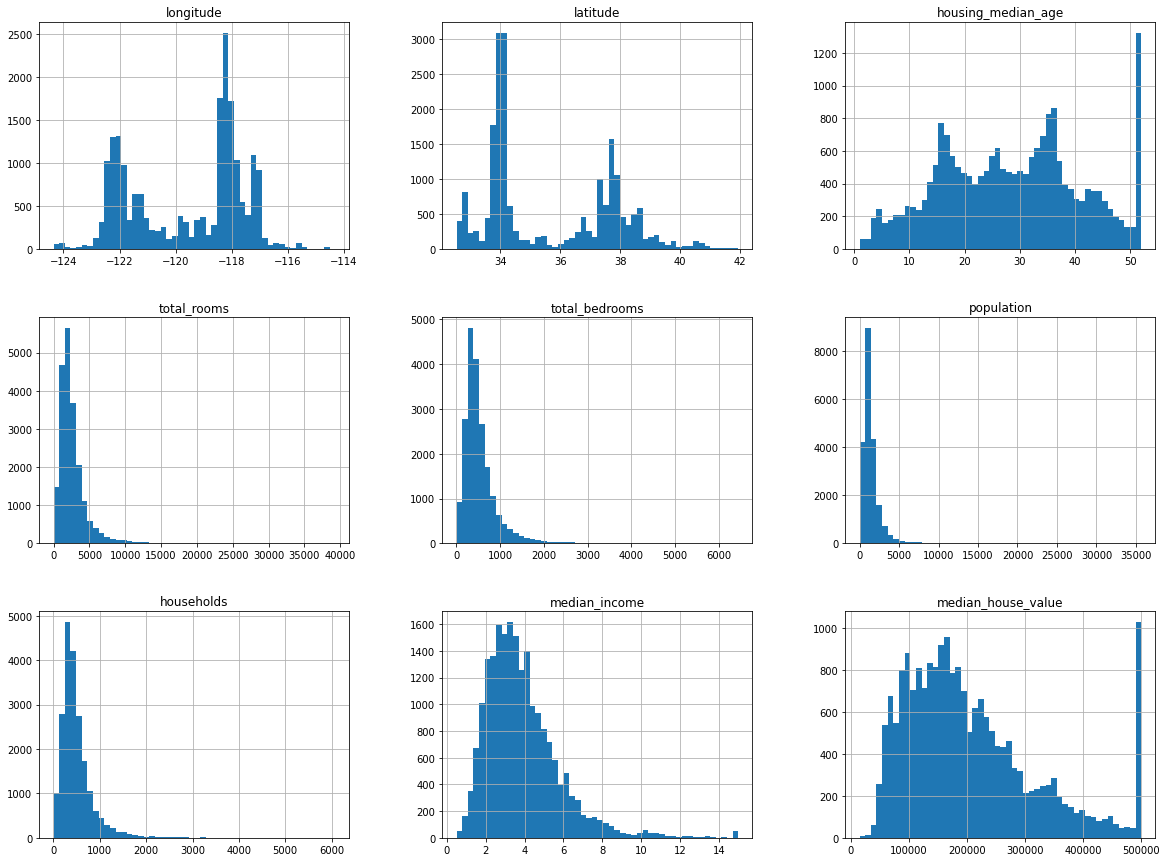

In [8]:
h = housing.hist(bins=50, figsize=(20, 15))

## 3. 데이터 세트 분리
- 훈련 데이터 / 테스트 데이터

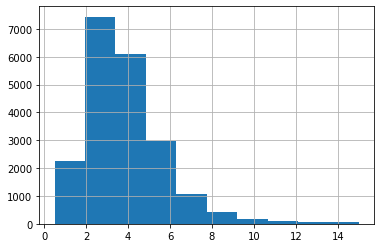

In [9]:
housing["median_income"].hist()

In [10]:
# median_incom이 주택 가격을 예측하는데 중요한 특성이다 가정하고
# 훈련데이터와 테스트 데이터를 나눌때 이 소득의 비율이 그대로 반영되게 하자
bins= [0, 1.5, 3.0, 4.5, 6.0, np.inf]
labels = [1, 2, 3, 4, 5]
housing["income_cat"]= pd.cut(housing["median_income"], bins=bins, labels=labels)


In [11]:
housing["income_cat"].value_counts()/len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [12]:
# 1. 무작위 추출
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [13]:
# 2. 계층적 샘플링
strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, random_state=42, stratify= housing["income_cat"])

In [14]:
strat_train_set["income_cat"].value_counts()/len(strat_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: income_cat, dtype: float64

In [15]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [16]:
strat_train_set.drop("income_cat", axis=1, inplace=True) # axis=1 : 열을 삭제
strat_test_set.drop("income_cat", axis=1, inplace=True)

## 4. 데이터 탐색

In [18]:
housing = strat_train_set.copy()

### 4.1 지리적 데이터 시각화

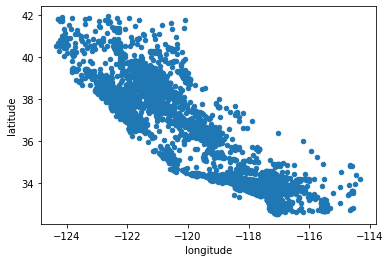

In [20]:
housing.plot(kind="scatter", x="longitude", y="latitude")

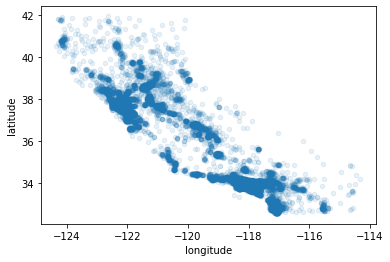

In [21]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1) # alpha : 투명도를 조절할 수 있는 파라미터

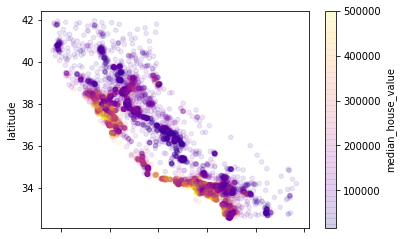

In [22]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1, # alpha : 투명도를 조절할 수 있는 파라미터
             c = "median_house_value", cmap="plasma") # color를 통해서 주택가격을 알 수 있음

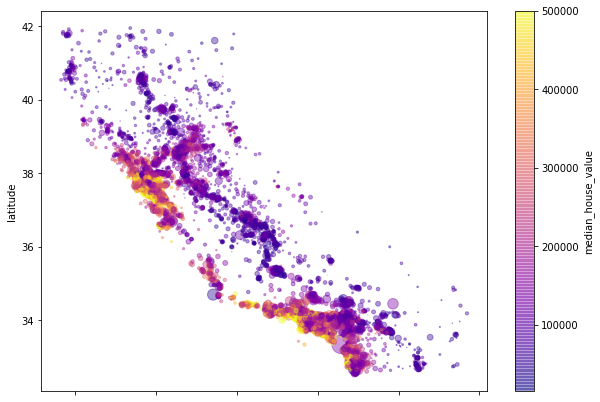

In [23]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, # alpha : 투명도를 조절할 수 있는 파라미터
             c = "median_house_value", cmap="plasma",  # color를 통해서 주택가격을 알 수 있음
             s = housing["population"]/100, figsize=(10, 7)) # size를 통해서 인구 정보를 알 수 있음

- 해안가이면서 밀집지역일 수록 주택 가격이 높음

### 4.2 상관관계 조사

In [24]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False) # 타깃과의 상관관계 내림차순으로 정렬

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

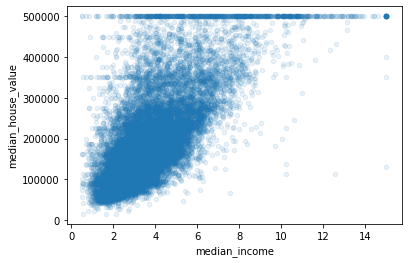

In [25]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

### 4.3 특성 조합을 실험

In [ ]:
# 탐색적 데이터 분석
# 궁극적으로 어떤 특성을 선택할지, 제거할지, 조합을 통해 더 좋은 특성을 만들 수 있는지를 분석
# 시각화(데이터의 경향성, 왜곡, 특잇값, 통계적 정보), 상관관계, 결측지를 통해 종합적으로 분석
# 탐색적 데이터 분석 결과로 모델링 설계 방향을 결정할 수 있음

In [ ]:
# total_rooms/households 가구당 방의 개수
# total_bedrooms/total_rooms 전체 방에서 침실방의 비율
# population/households 가구당 인구수

In [26]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_household"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [27]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False) # 타깃과의 상관관계 내림차순으로 정렬

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_household     -0.259952
Name: median_house_value, dtype: float64

## 5. 데이터 전처리

In [28]:
# 특성값과 레이블 분리
housing = strat_train_set.drop('median_house_value', axis=1) # 특성(X)
housing_label = strat_train_set['median_house_value'].copy() # 레이블(y)

### 5.1 데이터 전처리(1) - 결손값 처리

#### 5.1.1 Pandas

In [30]:
sample_incomplete_row = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_row

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN


In [31]:
# option 1 : Null이 있는 행(샘플)을 삭제

In [32]:
sample_incomplete_row.dropna(axis=0)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [33]:
# option 2 : Null이 있는 열(특성)을 삭제

In [34]:
sample_incomplete_row.drop("total_bedrooms", axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,1145.0,480.0,6.3580,NEAR OCEAN


In [35]:
# option 3 : Null 값을 다른값으로 대체

In [36]:
median = housing["total_bedrooms"].median()
sample_incomplete_row["total_bedrooms"].fillna(median, inplace=True)
sample_incomplete_row

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580,NEAR OCEAN


#### 5.1.2 Scikit-learn

In [37]:
housing_num = housing.drop('ocean_proximity', axis=1)

In [39]:
# 수치형 데이터의 누락값을 처리해 주는 scikit-learn 변환기
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy= 'median') # 변환기 객체 생성

In [40]:
imputer.fit(housing_num) # 어떻게 변환할지 준비(추정) - 중앙값을 구해 놓음


SimpleImputer(strategy='median')

In [41]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [42]:
X = imputer.transform(housing_num) # 실제 변환이 이루어짐

In [43]:
housing_num_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)
housing_num_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [44]:
housing_num_tr["total_bedrooms"].isnull().sum()

0

In [45]:
sample_incomplete_row.index

Int64Index([1606, 10915, 19150, 4186, 16885], dtype='int64')

In [46]:
housing_num_tr.loc[sample_incomplete_row.index]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580


### 5.2 데이터 전처리(2) - 데이터 인코딩
- 데이터 인코딩을 하는 이유는 머신러닝에서는 수치 값만 기대하기 때문

In [47]:
housing_cat = housing[['ocean_proximity']]
housing_cat

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
...,...
15174,<1H OCEAN
12661,INLAND
19263,<1H OCEAN
19140,<1H OCEAN


#### (1) 레이블 인코딩

In [48]:
housing_cat.value_counts()

ocean_proximity
<1H OCEAN          7277
INLAND             5262
NEAR OCEAN         2124
NEAR BAY           1847
ISLAND                2
dtype: int64

In [50]:
# pandas
pd.factorize(housing['ocean_proximity'])

(array([0, 1, 0, ..., 2, 2, 0]),
 Index(['INLAND', 'NEAR OCEAN', '<1H OCEAN', 'NEAR BAY', 'ISLAND'], dtype='object'))

In [51]:
# scikit-learn의 변환기 사용방법
# 객체 생성
# fit() -> transform()
# fit_transform()

In [52]:
from sklearn.preprocessing import OrdinalEncoder # LableEncoder 1차원만 가능
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded

array([[1.],
       [4.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]])

#### (2) 원핫 인코딩

In [53]:
# pandas
pd.get_dummies(housing_cat)

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
12655,0,1,0,0,0
15502,0,0,0,0,1
2908,0,1,0,0,0
14053,0,0,0,0,1
20496,1,0,0,0,0
...,...,...,...,...,...
15174,1,0,0,0,0
12661,0,1,0,0,0
19263,1,0,0,0,0
19140,1,0,0,0,0


In [54]:
# scikit-learn
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse=False) # default : sparse=True
housing_cat_encoded = onehot_encoder.fit_transform(housing_cat)
housing_cat_encoded

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [55]:
# sparse matrix 일 경우 아래 toarray()로 데이터 확인
# housing_cat_encoded.toarray()

In [56]:
onehot_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### 5.3 데이터 전처리(3) - 특성 스케일링

In [57]:
# 표준화(Z score Standardize) : 평균 0, 표준편차 1
# 정규화(Min Max Scaling) : 0~1 사이로 정규화 (참고: 특잇값에 영향을 받음)

In [58]:
# pandas
def zscore_standize(arr): # 평균 0, 표준편차 1
    return (arr - arr.mean())/arr.std()

housing_num.apply(zscore_standize)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-0.941322,1.347397,0.027563,0.584760,0.635103,0.732580,0.556269,-0.893620
15502,1.171747,-1.192404,-1.721965,1.261428,0.775653,0.533595,0.721296,1.292129
2908,0.267573,-0.125968,1.220423,-0.469759,-0.545029,-0.674655,-0.524391,-0.525418
14053,1.221701,-1.351433,-0.370057,-0.348641,-0.038565,-0.467603,-0.037296,-0.865903
20496,0.437418,-0.635799,-0.131485,0.427167,0.269190,0.374049,0.220892,0.325742
...,...,...,...,...,...,...,...,...
15174,1.251674,-1.220468,-1.165297,1.890398,1.686802,0.543455,1.341478,0.637354
12661,-0.921340,1.342720,-1.085773,2.468396,2.149647,3.002083,2.451418,-0.557492
19263,-1.570747,1.309979,1.538519,-0.895775,-0.893980,-0.861987,-0.865092,-0.365464
19140,-1.560756,1.249173,-1.165297,0.248997,0.109254,-0.189741,0.010615,0.168256


In [59]:
# scikit-learn
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
housing_num_standardized = std_scaler.fit_transform(housing_num)
housing_num_standardized


array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.73260236,
         0.55628602, -0.8936472 ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.53361152,
         0.72131799,  1.292168  ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.67467519,
        -0.52440722, -0.52543365],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.86201341,
        -0.86511838, -0.36547546],
       [-1.56080303,  1.2492109 , -1.1653327 , ..., -0.18974707,
         0.01061579,  0.16826095],
       [-1.28105026,  2.02567448, -0.13148926, ..., -0.71232211,
        -0.79857323, -0.390569  ]])

In [60]:
housing_num_standardized.mean(0)

array([-5.24924634e-15,  2.81159678e-16,  8.77850764e-17, -1.54914841e-17,
                   nan,  6.45478503e-19, -1.05428155e-17,  1.14841384e-16])

In [61]:
housing_num_standardized.std(0)

array([ 1.,  1.,  1.,  1., nan,  1.,  1.,  1.])

### 5.4 데이터 전처리(4) - 변환 파이프라인

In [ ]:
housing_num.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

```
# 나만의 변환기 만들기
# 1. 아래 형식을 그대로 가져갑니다.
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
  def __init__(self, add_bedrooms_per_room=True):
    self.add_bedrooms_per_room = add_bedrooms_per_room

  def fit(self, X, y=None):
    return self

  def transform(self, X):
    # Todo

# 2. transform 위주로 코드를 채우기
- X로 들어오는 값은 numpy
- 현재 이 함수에서 해줘야 하는 작업은 특성을 추가하는 것임
- 추가할 특성을 색인해서(numpy기준으로) 원본데이터에서 Add 시킴

# 3. 만약 변환기를 만들때 초기값을 설정하고 싶으면 __init__ 함수 채우기 
예) add_bedrooms_per_room 속성을 True/False 조절하고 싶을때 매개 변수를 추가할 수 있음
```

In [63]:
# 나만의 변환기 만들기 - 속성 추가 변환기
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
  def __init__(self, add_bedrooms_per_room=True):
    self.add_bedrooms_per_room = add_bedrooms_per_room

  def fit(self, X, y=None):
    return self

  def transform(self, X):
    # Todo
    rooms_per_household = X[:, rooms_ix]/X[:, households_ix]    
    population_per_household = X[:, population_ix]/X[:, households_ix]
    if self.add_bedrooms_per_room:
      bedrooms_per_household = X[:, bedrooms_ix]/X[:, rooms_ix]
      return np.c_[X,rooms_per_household, bedrooms_per_household, population_per_household]
    else:
      return np.c_[X,rooms_per_household, population_per_household]

# housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
# housing["bedrooms_per_household"] = housing["total_bedrooms"]/housing["total_rooms"]
# housing["population_per_household"] = housing["population"]/housing["households"]    

In [ ]:
# housing_num : 결손값처리 -> 표준화(특성 스케일링)
# housing_cat : 원핫 인코딩

In [64]:
from sklearn.pipeline import Pipeline

# 수치형 특성 파이프라인
num_pipeline = Pipeline([
                         ("imputer",  SimpleImputer(strategy="median")),
                         ("attrbs_adder", CombinedAttributesAdder()), #속성 추가 변환기
                         ("std_scaler",  StandardScaler())                         
            ])
housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
        -0.12112176,  0.00622264],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.81086696, -0.04081077],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.33827252, -0.07537122],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
         0.32286937, -0.03743619],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.45702273, -0.05915604],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
        -0.12169672,  0.00657083]])

In [65]:
housing_num.shape, housing_num_tr.shape

((16512, 8), (16512, 11))

In [ ]:
# 범주형 특성 변환기
# OneHotEncoder()

In [66]:
from sklearn.compose import ColumnTransformer

In [67]:
num_attrib = list(housing_num.columns.values)
cat_attrib = ["ocean_proximity"]

In [68]:
full_pipeline = ColumnTransformer([
                          ("num", num_pipeline, num_attrib), # 수치형 특성
                          ("cat", OneHotEncoder(), cat_attrib) # 범주형 특성                                                             
    ])
housing_prepared = full_pipeline.fit_transform(housing)

In [69]:
housing_prepared.shape, housing.shape

((16512, 16), (16512, 9))

## 6. 모델 선택과 훈련

### 6.1 선형회귀 모델과 결정 트리 모델 훈련
- 교차 검증 사용하지 않으면 올바른 검증 방법이 아님

In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_label)

LinearRegression()

In [72]:
from sklearn.metrics import mean_squared_error # MSE
from sklearn.metrics import mean_absolute_error # MAE
from sklearn.metrics import r2_score # R2

In [73]:
housing_predict = lin_reg.predict(housing_prepared)

In [74]:
lin_mse = mean_squared_error(housing_label, housing_predict)
lin_mse

4709785076.060029

In [75]:
lin_rmse = mean_squared_error(housing_label, housing_predict, squared=False)
lin_rmse # RMSE는 성능 측정지표로서 작을 수록 좋은값

68627.87390018745

In [76]:
from sklearn.tree import DecisionTreeRegressor

In [77]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_label)

DecisionTreeRegressor(random_state=42)

In [78]:
housing_predict = tree_reg.predict(housing_prepared)

In [79]:
tree_mse = mean_squared_error(housing_label, housing_predict)
tree_mse

0.0

In [80]:
tree_rmse = mean_squared_error(housing_label, housing_predict, squared=False)
tree_rmse # RMSE는 성능 측정지표로서 작을 수록 좋은값

0.0

### 6.2 선형회귀 모델과 결정 트리 모델 훈련
- 교차 검증 사용하여 평가

In [81]:
from sklearn.model_selection import cross_val_score

In [82]:
scores = cross_val_score(lin_reg, housing_prepared, housing_label, scoring="neg_mean_squared_error", cv=10)

In [83]:
scores

array([-5.14989425e+09, -4.11073216e+09, -4.59293165e+09, -4.71078941e+09,
       -4.46840655e+09, -5.26031619e+09, -5.47556792e+09, -4.73376148e+09,
       -4.41471057e+09, -4.91959144e+09])

In [84]:
-scores

array([5.14989425e+09, 4.11073216e+09, 4.59293165e+09, 4.71078941e+09,
       4.46840655e+09, 5.26031619e+09, 5.47556792e+09, 4.73376148e+09,
       4.41471057e+09, 4.91959144e+09])

In [85]:
np.sqrt(-scores) #lin_reg 모델의 rmse 10개값

array([71762.76364394, 64114.99166359, 67771.17124356, 68635.19072082,
       66846.14089488, 72528.03725385, 73997.08050233, 68802.33629334,
       66443.28836884, 70139.79923956])

In [86]:
np.sqrt(-scores).mean()

69104.07998247063

In [87]:
scores = cross_val_score(tree_reg, housing_prepared, housing_label, scoring="neg_mean_squared_error", cv=10)

In [88]:
np.sqrt(-scores).mean()

71444.17827643351

## 7. 모델 세부 튜닝

## 8. 모델 예측과 성능 평가

## 9. 모델 저장